In [23]:
import torch
import matplotlib.pyplot as plt

from dataset import SegmentationDataset, DataLoader

In [24]:
image_dir = '../datasets/Brain_tumor_segmentation/images'
mask_dir = '../datasets/Brain_tumor_segmentation/masks'
dataset = SegmentationDataset(image_dir, mask_dir)

In [25]:
image, mask = dataset[4]
image.shape

torch.Size([3, 256, 256])

In [26]:
print("Image min/max:", image.min().item(), image.max().item())
print("Máscara min/max:", mask.min().item(), mask.max().item())

Image min/max: 0.0 0.9215686321258545
Máscara min/max: 0.0 1.0


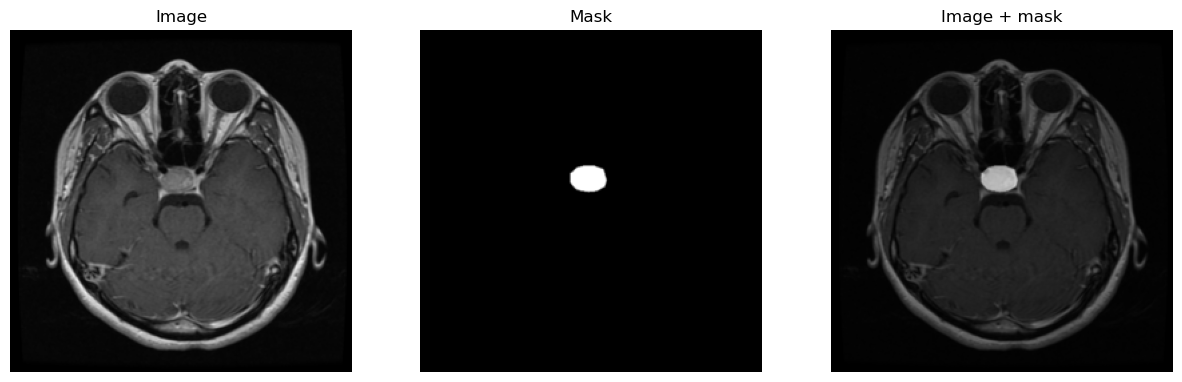

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.title("Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask.squeeze(), cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)

plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.imshow(mask.squeeze(), cmap="gray", alpha=0.5)
plt.title("Image + mask")
plt.axis("off")
plt.show()

In [28]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [29]:
from unet import UNet

In [30]:
model = UNet(in_channels=3, out_channels=1)

In [31]:
images, masks = next(iter(dataloader))
images.shape

torch.Size([1, 3, 256, 256])

In [32]:
outputs = model(images)
print(outputs.shape)
print("Output min/max:", outputs.min().item(), outputs.max().item())
output_sigmoid = torch.sigmoid(outputs)
print("Output sigmoid min/max:", output_sigmoid.min().item(), output_sigmoid.max().item())

torch.Size([1, 1, 256, 256])
Output min/max: -0.060689859092235565 -0.04897445812821388
Output sigmoid min/max: 0.48483216762542725 0.4877588152885437


In [35]:
model.load_state_dict(torch.load("./models/unet_14_03.pth", weights_only=True))

Listo


In [20]:
outputs = model(images)
print(outputs.shape)
print("Output min/max:", outputs.min().item(), outputs.max().item())
output_sigmoid = torch.sigmoid(outputs)
print("Output sigmoid min/max:", output_sigmoid.min().item(), output_sigmoid.max().item())

torch.Size([1, 1, 256, 256])
Output min/max: -44.659576416015625 12.22471809387207
Output sigmoid min/max: 4.023392605408575e-20 0.9999951124191284


In [21]:
outputs_without_sigmoid = outputs.squeeze(0).detach()
print(outputs_without_sigmoid.shape)
image_to_show = images.squeeze(0)
print(image_to_show.shape)
mask_to_show = masks.squeeze(0)
print(mask_to_show.shape)
output_to_show = output_sigmoid.squeeze(0).detach()
print(output_to_show.shape)

torch.Size([1, 256, 256])
torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


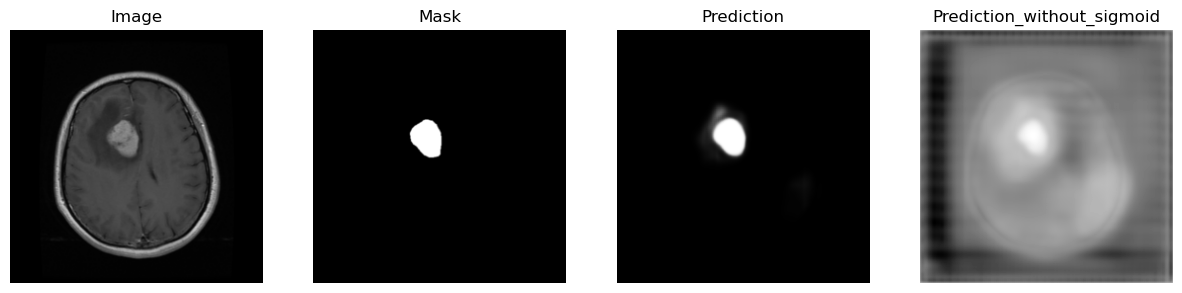

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image_to_show.permute(1, 2, 0), cmap='gray')
plt.title("Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(mask_to_show.permute(1, 2, 0), cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(output_to_show.permute(1, 2, 0), cmap='gray')
plt.title("Prediction")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(outputs_without_sigmoid.permute(1, 2, 0), cmap='gray')
plt.title("Prediction_without_sigmoid")
plt.axis("off")
plt.show()